## PyTorch Resnets

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)
pd.set_option('display.max_rows', 50)

# get an absolute path to the directory that contains parent files
project_dir = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH,
)
from experiments.utils.parser import Parser

In [6]:
series = 303
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"
model_name = "resnet-human" # change yolo - resnet-human
series_path = os.path.join(NODE_PROFILING_RESULTS_PATH, "series", str(series))
loader = Parser(
    series_path=series_path, config_key_mapper=config_key_mapper, model_name=model_name
)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [7]:
results.columns

Index(['experiment_id', 'client_to_model_avg', 'client_to_model_p99',
       'client_to_model_p95', 'client_to_model_p50', 'client_to_model_var',
       'client_to_model_max', 'client_to_model_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p95', 'model_latencies_p50',
       'model_latencies_var', 'model_latencies_max', 'model_latencies_min',
       'model_to_client_avg', 'model_to_client_p99', 'model_to_client_p95',
       'model_to_client_p50', 'model_to_client_var', 'model_to_client_max',
       'model_to_client_min', 'e2e_latencies_avg', 'e2e_latencies_p99',
       'e2e_latencies_p95', 'e2e_latencies_p50', 'e2e_latencies_var',
       'e2e_latencies_max', 'e2e_latencies_min', 'start_time', 'end_time',
       'duration', 'timeout_count', 'cpu_usage_count_avg',
       'cpu_usage_count_p99', 'cpu_usage_count_p95', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p

In [8]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 0.yaml
{   'benchmark_duration': 1,
    'central_queue': False,
    'cpu_request': ['1', '2', '4', '8', '16', '32'],
    'data_type': 'image',
    'distrpution_time': 10,
    'logs_enabled': False,
    'max_batch_size': ['1', '2', '4', '8', '16', '32'],
    'max_batch_time': ['1'],
    'memory_request': ['10Gi'],
    'mode': 'exponential',
    'model_variants': [   'resnet18',
                          'resnet34',
                          'resnet50',
                          'resnet101',
                          'resnet152'],
    'node_name': 'resnet-human',
    'num_interop_threads': ['1'],
    'num_threads': ['1'],
    'pipeline_name': 'video',
    'repetition': 1,
    'replicas': [1],
    'series': 303,
    'series_meta': 'all variables change for making the profiler 1,\\n cpu '
                   'type: Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'timeout': 1,
    'use_threading': 'True',
    'workload_config': {'load_duration': 60, 'loads_to_test': [128]},
    'wo

In [9]:
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine,mode,data_type,benchmark_duration
0,1,video,resnet-human,resnet18,1,10Gi,1,1,128,60,303,all variables change for making the profiler 1...,1,False,exponential,image,1
1,2,video,resnet-human,resnet18,2,10Gi,1,1,128,60,303,all variables change for making the profiler 1...,1,False,exponential,image,1
2,3,video,resnet-human,resnet18,4,10Gi,1,1,128,60,303,all variables change for making the profiler 1...,1,False,exponential,image,1
3,4,video,resnet-human,resnet18,8,10Gi,1,1,128,60,303,all variables change for making the profiler 1...,1,False,exponential,image,1
4,5,video,resnet-human,resnet18,16,10Gi,1,1,128,60,303,all variables change for making the profiler 1...,1,False,exponential,image,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,video,resnet-human,resnet152,2,10Gi,32,1,128,60,303,all variables change for making the profiler 1...,1,False,exponential,image,1
176,177,video,resnet-human,resnet152,4,10Gi,32,1,128,60,303,all variables change for making the profiler 1...,1,False,exponential,image,1
177,178,video,resnet-human,resnet152,8,10Gi,32,1,128,60,303,all variables change for making the profiler 1...,1,False,exponential,image,1
178,179,video,resnet-human,resnet152,16,10Gi,32,1,128,60,303,all variables change for making the profiler 1...,1,False,exponential,image,1


In [10]:
# experiment_ids = key_config_df["experiment_id"].tolist()
    # (key_config_df["model_variant"] == "resnet18") & (key_config_df["cpu_request"] == 2.2)
experiment_ids = key_config_df[(key_config_df["model_variant"] == "resnet18") & (key_config_df["load"] == 128)]["experiment_id"].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request", "load"]
results_columns = [
    "model_latencies_min",
    "model_latencies_p95",
    "model_latencies_p99",
    "cpu_usage_count_avg",
    "model_latencies_avg",
    "throughput_max",
]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)

# output["expected_throughput"] = (
#     1 / output["model_latencies_avg"] * output["max_batch_size"]
# )
# output.sort_values(by='throughput')
display(output)

,model_variant,max_batch_size,cpu_request,load,model_latencies_min,model_latencies_p95,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,throughput_max
0,resnet18,1,1,128,0.039839,0.045993,0.054195,157.885417,0.042196,22.862275
1,resnet18,1,2,128,0.024188,0.028877,0.035003,185.374097,0.025600,37.357843
2,resnet18,1,4,128,0.014823,0.018015,0.023575,186.920963,0.016083,57.969466
3,resnet18,1,8,128,0.010877,0.012402,0.015795,230.090607,0.011569,78.708333
4,resnet18,1,16,128,0.009425,0.012998,0.016013,594.923817,0.012063,70.009259
5,resnet18,1,32,128,0.009038,0.012614,0.014628,1085.476428,0.010281,85.579545
6,resnet18,2,1,128,0.069644,0.078691,0.096245,130.405355,0.073462,26.171233
7,resnet18,2,2,128,0.039750,0.044688,0.055946,149.230017,0.041825,44.970414
8,resnet18,2,4,128,0.023422,0.027158,0.031370,140.343004,0.025413,71.102804
9,resnet18,2,8,128,0.016856,0.018366,0.019888,228.029275,0.017632,97.672519


0     0.054195
1     0.035003
2     0.023575
3     0.015795
4     0.016013
5     0.014628
6     0.096245
7     0.055946
8     0.031370
9     0.019888
10    0.017498
11    0.016633
12    0.176174
13    0.094141
14    0.054822
15    0.036565
16    0.032298
17    0.030501
18    0.339858
19    0.205022
20    0.092273
21    0.061467
22    0.054881
23    0.053280
24    0.604740
25    0.340383
26    0.198315
27    0.134329
28    0.103178
29    0.107720
30    1.240279
31    0.675325
32    0.375736
33    0.242460
34    0.186781
35    0.173307
Name: model_latencies_p99, dtype: float64


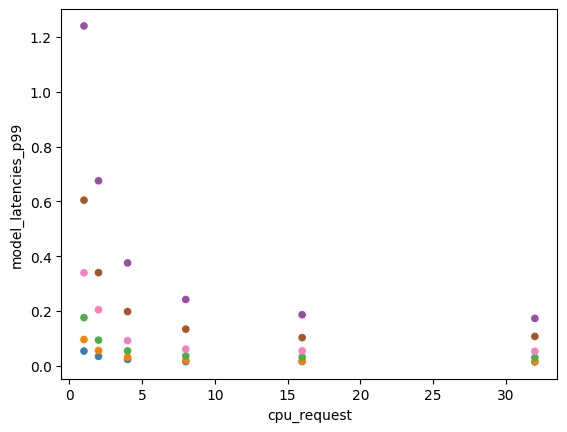

In [11]:
color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

ax = output.plot.scatter(
    x="cpu_request", y="model_latencies_p99", c=output['max_batch_size'].map({1:color[0], 2:color[1], 4:color[2], 8:color[3], 16:color[4], 32:color[5]}), style="o-"
)
print(output['model_latencies_p99'])

In [12]:
display(output[output['cpu_request']==4])

,model_variant,max_batch_size,cpu_request,load,model_latencies_min,model_latencies_p95,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,throughput_max
2,resnet18,1,4,128,0.014823,0.018015,0.023575,186.920963,0.016083,57.969466
8,resnet18,2,4,128,0.023422,0.027158,0.031370,140.343004,0.025413,71.102804
14,resnet18,4,4,128,0.045449,0.050079,0.054822,127.007515,0.047752,74.178218
20,resnet18,8,4,128,0.080161,0.087943,0.092273,135.771838,0.083612,86.947354
26,resnet18,16,4,128,0.067273,0.189030,0.198315,105.898395,0.131189,77.742268
32,resnet18,32,4,128,0.050668,0.335111,0.375736,139.307586,0.132090,87.011494
